In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/train.csv", header=0) #Might take a while to run :)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
init_count = df["key"].count()
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
key                  55423856 non-null object
fare_amount          55423856 non-null float64
pickup_datetime      55423856 non-null object
pickup_longitude     55423856 non-null float64
pickup_latitude      55423856 non-null float64
dropoff_longitude    55423480 non-null float64
dropoff_latitude     55423480 non-null float64
passenger_count      55423856 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ GB


In [4]:
df.dropna(inplace=True)
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55423480 entries, 0 to 55423855
Data columns (total 8 columns):
key                  55423480 non-null object
fare_amount          55423480 non-null float64
pickup_datetime      55423480 non-null object
pickup_longitude     55423480 non-null float64
pickup_latitude      55423480 non-null float64
dropoff_longitude    55423480 non-null float64
dropoff_latitude     55423480 non-null float64
passenger_count      55423480 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.7+ GB


In [5]:
df[["key","pickup_datetime"]].head(10)

,key,pickup_datetime
0,2009-06-15 17:26:21.0000001,2009-06-15 17:26:21 UTC
1,2010-01-05 16:52:16.0000002,2010-01-05 16:52:16 UTC
2,2011-08-18 00:35:00.00000049,2011-08-18 00:35:00 UTC
3,2012-04-21 04:30:42.0000001,2012-04-21 04:30:42 UTC
4,2010-03-09 07:51:00.000000135,2010-03-09 07:51:00 UTC
5,2011-01-06 09:50:45.0000002,2011-01-06 09:50:45 UTC
6,2012-11-20 20:35:00.0000001,2012-11-20 20:35:00 UTC
7,2012-01-04 17:22:00.00000081,2012-01-04 17:22:00 UTC
8,2012-12-03 13:10:00.000000125,2012-12-03 13:10:00 UTC
9,2009-09-02 01:11:00.00000083,2009-09-02 01:11:00 UTC


In [6]:
df.drop(["key"], axis = 1, inplace=True)

In [7]:
df["fare_amount"].describe()

count    5.542348e+07
mean     1.134500e+01
std      2.071087e+01
min     -3.000000e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      9.396336e+04
Name: fare_amount, dtype: float64

In [8]:
df=df[df["fare_amount"]>=0]
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55421026 entries, 0 to 55423855
Data columns (total 7 columns):
fare_amount          55421026 non-null float64
pickup_datetime      55421026 non-null object
pickup_longitude     55421026 non-null float64
pickup_latitude      55421026 non-null float64
dropoff_longitude    55421026 non-null float64
dropoff_latitude     55421026 non-null float64
passenger_count      55421026 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.3+ GB


In [9]:
df["fare_amount"].describe()

count    5.542103e+07
mean     1.134596e+01
std      2.071050e+01
min      0.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      9.396336e+04
Name: fare_amount, dtype: float64

In [10]:
df["pickup_datetime"].head(10)

0    2009-06-15 17:26:21 UTC
1    2010-01-05 16:52:16 UTC
2    2011-08-18 00:35:00 UTC
3    2012-04-21 04:30:42 UTC
4    2010-03-09 07:51:00 UTC
5    2011-01-06 09:50:45 UTC
6    2012-11-20 20:35:00 UTC
7    2012-01-04 17:22:00 UTC
8    2012-12-03 13:10:00 UTC
9    2009-09-02 01:11:00 UTC
Name: pickup_datetime, dtype: object

In [11]:
df["pickup_year"]=df["pickup_datetime"].apply(lambda x: int(x[0:4])).astype(np.int32)

In [12]:
df["pickup_month"]=df["pickup_datetime"].apply(lambda x: int(x[5:7])).astype(np.int32)

In [13]:
df["pickup_day"]=df["pickup_datetime"].apply(lambda x: int(x[8:10])).astype(np.int32)

In [14]:
df["pickup_hour"]=df["pickup_datetime"].apply(lambda x: int(x[11:13])).astype(np.int32)

In [15]:
df["pickup_mins"]=df["pickup_datetime"].apply(lambda x: float(x[14:16]+"."+x[17:19])).astype(np.float32)

In [16]:
df.drop(["pickup_datetime"],axis=1,inplace=True)

In [17]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_mins
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26.209999
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52.160000
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35.000000
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30.420000
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55421026 entries, 0 to 55423855
Data columns (total 11 columns):
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
pickup_year          int32
pickup_month         int32
pickup_day           int32
pickup_hour          int32
pickup_mins          float32
dtypes: float32(1), float64(5), int32(4), int64(1)
memory usage: 3.9 GB


In [19]:
df["fare_amount"]=df["fare_amount"].astype(np.float32)
df["pickup_longitude"]=df["pickup_longitude"].astype(np.float32)
df["pickup_latitude"]=df["pickup_latitude"].astype(np.float32)
df["dropoff_longitude"]=df["dropoff_longitude"].astype(np.float32)
df["dropoff_latitude"]=df["dropoff_latitude"].astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55421026 entries, 0 to 55423855
Data columns (total 11 columns):
fare_amount          float32
pickup_longitude     float32
pickup_latitude      float32
dropoff_longitude    float32
dropoff_latitude     float32
passenger_count      int64
pickup_year          int32
pickup_month         int32
pickup_day           int32
pickup_hour          int32
pickup_mins          float32
dtypes: float32(6), int32(4), int64(1)
memory usage: 2.9 GB


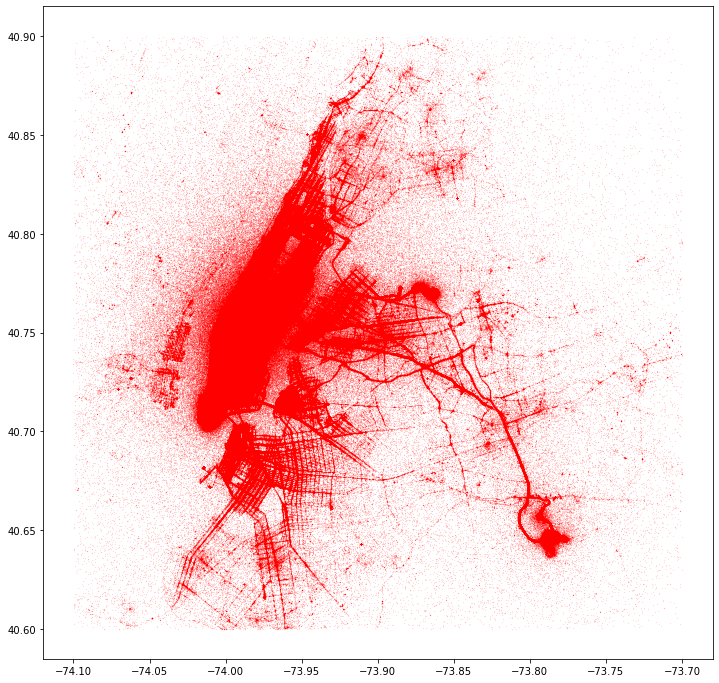

In [23]:
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)

plot_hires(df, (-74.1, -73.7, 40.6, 40.9))